## Decision Tree Model

In [408]:
import jenkspy as jenkspy
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, classification_report

In [409]:
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('prepared_data.csv')
df



,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
0,0.931846,0,1,2.500974,0.859059,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
1,1.673346,0,1,-0.056516,0.279850,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,-0.094846,0,0,1.303993,0.548264,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,1
3,1.616307,1,0,1.364196,-0.920950,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
4,1.730384,0,0,1.616050,-0.214597,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,-0.551154,0,0,-0.801661,-0.227499,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4190,-0.608193,0,0,1.718958,0.345098,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4191,-0.323000,1,0,-0.283580,0.402209,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
4192,-0.608193,0,0,-0.514394,0.025377,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


In [410]:
train, test = train_test_split(df,test_size=0.2)
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
674,-0.608193,1,0,2.153504,-0.299359,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
1332,0.475538,0,0,-0.919151,0.138579,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
530,-1.349693,0,0,-0.281497,-0.497138,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1319,-0.551154,0,0,-0.119636,0.943821,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1730,-0.608193,0,0,-0.591262,-0.030945,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.190346,0,0,-0.475439,-1.245872,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2540,0.931846,0,0,-0.898319,0.378739,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2944,-0.323000,0,0,-0.181714,0.053817,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
228,1.160000,0,0,1.866028,-0.454757,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


<AxesSubplot:>

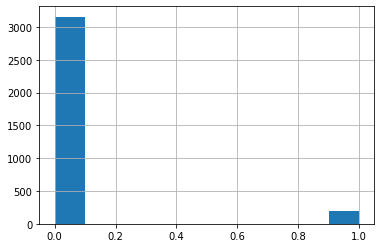

In [411]:
train['stroke'].hist()

### stroke = 1 <<<< stroke =0 => need to add

<AxesSubplot:title={'center':'count (Stroke)'}>

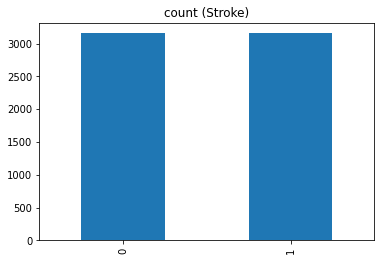

In [412]:
class_count_1, class_count_2 = train['stroke'].value_counts()
#seprate 2 classes of Outcome
class_1 = train[train['stroke'] == 0]
class_2 = train[train['stroke'] == 1]# print the shape of the class
#print('class 1:', class_1.shape)
#print('class 2:', class_2.shape)
class_2_over = class_2.sample(class_count_1, replace=True)
test_over = pd.concat([class_2_over, class_1], axis=0)
#print("total Outcome of 1 and 2:",test_over['Outcome'].value_counts())# plot the count after under-sampeling
test_over['stroke'].value_counts().plot(kind='bar', title='count (Stroke)')

In [413]:
y_train=test_over['stroke']
x_train=test_over.drop(columns='stroke')
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
201,0.874807,0,0,-0.670214,-1.316507,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
192,1.616307,0,0,-0.227126,-1.274126,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1
4024,0.703692,0,0,1.852071,0.111889,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
86,1.730384,0,1,-0.623551,-1.570794,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
38,1.445192,1,0,2.811156,0.435247,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.190346,0,0,-0.475439,-1.245872,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
2540,0.931846,0,0,-0.898319,0.378739,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
2944,-0.323000,0,0,-0.181714,0.053817,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
228,1.160000,0,0,1.866028,-0.454757,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1


<AxesSubplot:>

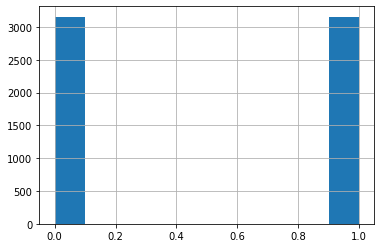

In [414]:
y_train.hist()

In [415]:
y_test=test['stroke']
x_test=test.drop(columns='stroke')
x_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
190,1.673346,1,0,-0.887487,0.689534,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
3402,-1.178577,0,0,0.092638,1.593666,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1
4130,1.274076,1,0,2.274952,0.649279,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0
854,-1.178577,0,0,0.039934,0.053817,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1972,1.559269,0,0,0.369906,-1.302380,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,0.760730,0,0,-0.386696,-0.271105,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
1610,1.045923,1,0,2.511807,-0.059200,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
1154,-0.437077,0,0,-0.556057,-0.398249,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
510,-1.007462,0,0,2.319323,1.282871,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0


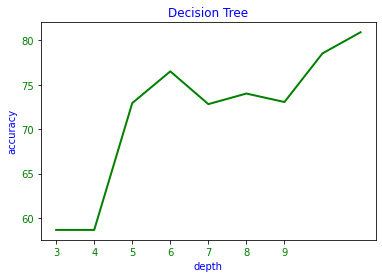

In [416]:
accuracy_list = []
for i in range(1,10):
    DecisionTree = DecisionTreeClassifier(max_depth = i, criterion='gini')
    DecisionTree.fit(x_train, y_train)
    y_pred = DecisionTree.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred)*100)
plt.figure()
plt.xticks([0,1,2,3,4,5,6],[3,4,5,6,7,8,9])
plt.plot(accuracy_list, color="green", linewidth=2)
plt.xlabel("depth",c="b")
plt.ylabel("accuracy",c="b")
plt.yticks(c= 'green')
plt.xticks(c= 'green')
plt.title("Decision Tree",c="b")
plt.show()

## 10 is the best for max depth

[Text(279.0, 475.65000000000003, 'X[0] <= 0.162\ngini = 0.5\nsamples = 6316\nvalue = [3158, 3158]'),
 Text(139.5, 339.75, 'X[0] <= -0.751\ngini = 0.265\nsamples = 2193\nvalue = [1849, 344]'),
 Text(69.75, 203.85000000000002, 'gini = 0.0\nsamples = 891\nvalue = [891, 0]'),
 Text(209.25, 203.85000000000002, 'gini = 0.389\nsamples = 1302\nvalue = [958, 344]'),
 Text(418.5, 339.75, 'X[0] <= 0.96\ngini = 0.433\nsamples = 4123\nvalue = [1309, 2814]'),
 Text(348.75, 203.85000000000002, 'X[3] <= 0.038\ngini = 0.493\nsamples = 1695\nvalue = [746, 949]'),
 Text(279.0, 67.94999999999999, 'gini = 0.487\nsamples = 858\nvalue = [499, 359]'),
 Text(418.5, 67.94999999999999, 'gini = 0.416\nsamples = 837\nvalue = [247, 590]'),
 Text(488.25, 203.85000000000002, 'gini = 0.356\nsamples = 2428\nvalue = [563, 1865]')]

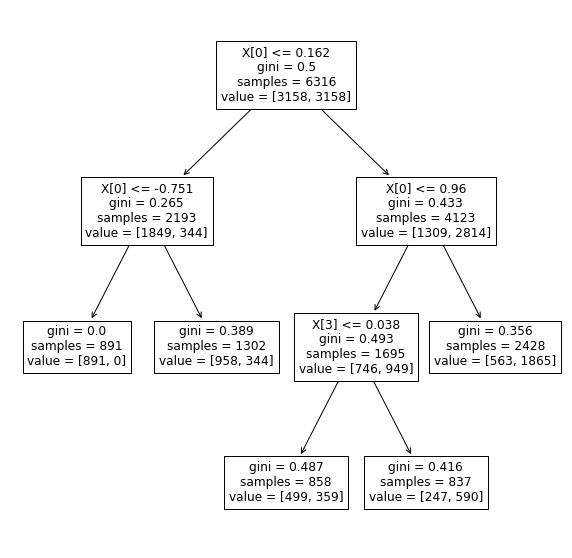

In [417]:


DT = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5,max_depth=10).fit(x_train,y_train)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT, ax=axs)


In [418]:
y_pred = DT.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7437425506555423

In [419]:
print('acc for training data: {:.3f}'.format(DT.score(x_train, y_train)*100))
print('acc for test data: {:.3f}'.format(DT.score(x_test, y_test)*100))

acc for training data: 76.045
acc for test data: 74.374


## classification report for gini

In [420]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       789
           1       0.15      0.68      0.24        50

    accuracy                           0.74       839
   macro avg       0.56      0.71      0.54       839
weighted avg       0.92      0.74      0.81       839



### ٍ Let's test Entropy

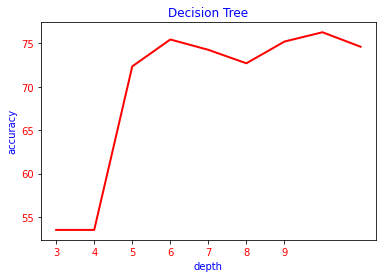

In [421]:
accuracy_list = []
for i in range(1,10):
    DecisionTree = DecisionTreeClassifier(max_depth = i, criterion="entropy")
    DecisionTree.fit(x_train, y_train)
    y_pred = DecisionTree.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred)*100)
plt.figure()
plt.xticks([0,1,2,3,4,5,6],[3,4,5,6,7,8,9])
plt.plot(accuracy_list, color="r", linewidth=2)
plt.xlabel("depth",c="b")
plt.ylabel("accuracy",c="b")
plt.yticks(c= 'r')
plt.xticks(c= 'r')
plt.title("Decision Tree",c="b")
plt.show()

## 10 is the best for max depth

[Text(279.0, 475.65000000000003, 'X[0] <= -0.009\nentropy = 1.0\nsamples = 6316\nvalue = [3158, 3158]'),
 Text(139.5, 339.75, 'X[0] <= -0.751\nentropy = 0.52\nsamples = 1857\nvalue = [1640, 217]'),
 Text(69.75, 203.85000000000002, 'entropy = 0.0\nsamples = 891\nvalue = [891, 0]'),
 Text(209.25, 203.85000000000002, 'entropy = 0.769\nsamples = 966\nvalue = [749, 217]'),
 Text(418.5, 339.75, 'X[0] <= 0.96\nentropy = 0.925\nsamples = 4459\nvalue = [1518, 2941]'),
 Text(348.75, 203.85000000000002, 'X[3] <= 0.038\nentropy = 0.997\nsamples = 2031\nvalue = [955, 1076]'),
 Text(279.0, 67.94999999999999, 'entropy = 0.978\nsamples = 1097\nvalue = [645, 452]'),
 Text(418.5, 67.94999999999999, 'entropy = 0.917\nsamples = 934\nvalue = [310, 624]'),
 Text(488.25, 203.85000000000002, 'entropy = 0.781\nsamples = 2428\nvalue = [563, 1865]')]

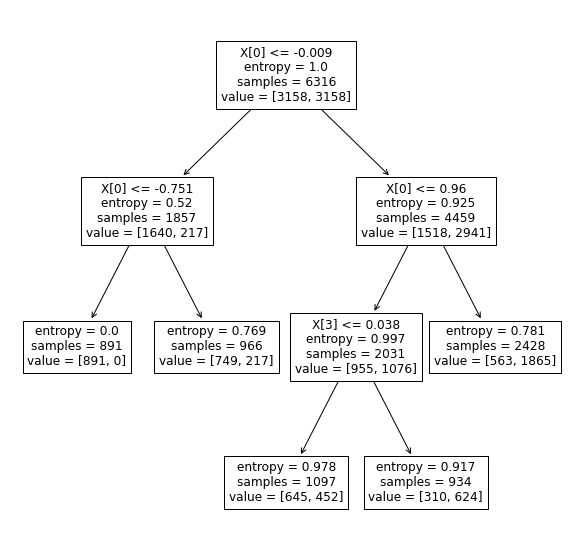

In [422]:


DT = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes=5,max_depth=10).fit(x_train,y_train)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT, ax=axs)

In [423]:
y_pred = DT.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7234803337306317

In [424]:
print('acc for training data: {:.3f}'.format(DT.score(x_train, y_train)*100))
print('acc for test data: {:.3f}'.format(DT.score(x_test, y_test)*100))

acc for training data: 75.586
acc for test data: 72.348


## classification report for entropy

In [425]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.72      0.83       789
           1       0.14      0.70      0.23        50

    accuracy                           0.72       839
   macro avg       0.56      0.71      0.53       839
weighted avg       0.92      0.72      0.80       839

